## Wordle Tweet Dataset


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wordle-tweets/tweets.csv


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from itertools import cycle
pd.set_option('max_columns',200)

plt.style.use('ggplot')
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## Importing the data

In [3]:
df = pd.read_csv('../input/wordle-tweets/tweets.csv')

In [4]:
df.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text
0,210,1482553374591660037,2022-01-16 03:20:43+00:00,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩
1,210,1482553387937898499,2022-01-16 03:20:46+00:00,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩
2,210,1482553422276698113,2022-01-16 03:20:55+00:00,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩
3,210,1482553436910628866,2022-01-16 03:20:58+00:00,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩
4,210,1482553445726908420,2022-01-16 03:21:00+00:00,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩


In [5]:
df.shape

(1062093, 5)

In [6]:
def process_tweets(df):
    df['tweet_datetime'] = pd.to_datetime(df['tweet_date'])
    df['tweet_date'] = df['tweet_datetime'].dt.date
    df['wordle_id'] = df['tweet_text'].str[:10]
    df['no_attempts'] = df['tweet_text'].str[11].astype(int)
    df['id'] = df['tweet_text'].str[7:10].astype(int)
    return df

In [7]:
df = process_tweets(df)

## Tweets for each date

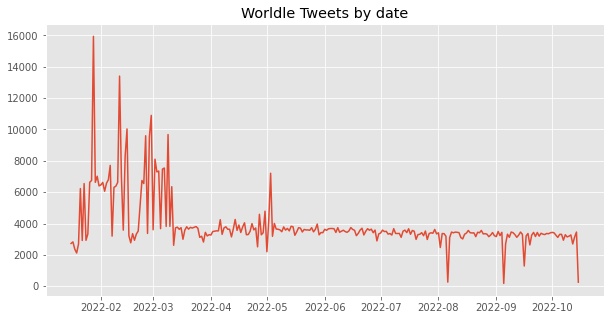

In [8]:
df['tweet_date'].value_counts() \
.plot(figsize = (10,5),title = 'Worldle Tweets by date')
plt.show()

## No of attempts analysis

In [9]:
df.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,no_attempts,id
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210


In [10]:
df.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,no_attempts,id
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬜⬜⬜⬜⬜\n🟩🟩🟨🟨⬜\n🟩🟩⬜🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬜⬜⬜🟨⬜\n⬜🟩⬜🟨⬜\n⬜🟩⬜🟨⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬜⬜🟨⬜⬜\n🟨🟨⬜⬜⬜\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210


In [11]:
df.groupby('wordle_id')['no_attempts'].value_counts()

wordle_id   no_attempts
Wordle 210  4              1064
            3               897
            5               489
            2               222
            6               165
                           ... 
Wordle 482  4              1509
            5               835
            3               769
            6               164
            2               118
Name: no_attempts, Length: 1345, dtype: int64

In [12]:
df.groupby('wordle_id')['no_attempts'].value_counts().unstack().style.background_gradient(axis = 1,)

no_attempts,2,3,4,5,6
wordle_id,,,,,
Wordle 210,222,897,1064,489,165
Wordle 211,196,903,1016,564,215
Wordle 212,191,787,820,413,188
Wordle 213,51,260,630,697,481
Wordle 214,383,1012,823,363,122
Wordle 215,246,877,1017,579,224
Wordle 216,461,1952,2078,1199,415
Wordle 217,102,566,1031,843,418
Wordle 218,170,1009,1384,730,187


## Attempts Taken To Solve

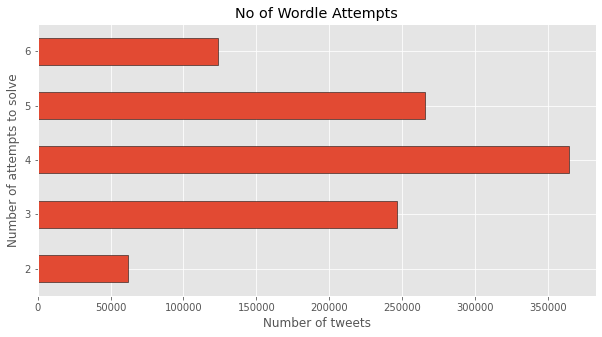

In [13]:
ax = df['no_attempts'].value_counts().sort_index().plot(kind = 'barh',
                                                   figsize = (10,5),
                                                   title = 'No of Wordle Attempts',
                                                   edgecolor = 'black')
ax.set_xlabel("Number of tweets")
ax.set_ylabel('Number of attempts to solve')
plt.show()

In [14]:
print(df['tweet_text'].values[0])

Wordle 210 4/6

⬛⬛🟨🟨⬛
🟩⬛⬛⬛⬛
🟩🟩🟨⬛⬛
🟩🟩🟩🟩🟩


In [15]:
# Make dark squares consistent
df['tweet_text'] = df['tweet_text'].str.replace('⬜','⬛')

In [16]:
def parse_tweets(df):
    for n in range(6):
        n+=1
        df[f'has_guess{n}'] = df['tweet_text'].str.split('\n').str[n+1]\
        .str.contains('|'.join(['🟨','⬛','🟩'])).fillna(False)
        df['has_guess1'].value_counts()

        ## Parsing out the tweet text for the guess
        df.loc[df[f'has_guess{n}'], f'guess{n}'] = \
        df['tweet_text'].str.split('\n').str[n+1].str[:5]

        ## Counting number correct and incorrect
        df.loc[df[f'has_guess{n}'],f'guess{n}_incorrect'] = df[f'guess{n}'].str.count('⬛')
        df.loc[df[f'has_guess{n}'],f'guess{n}_wrong_spot'] = df[f'guess{n}'].str.count('🟨')
        df.loc[df[f'has_guess{n}'],f'guess{n}_correct'] = df[f'guess{n}'].str.count('🟩')
        df.loc[df[f'guess{n}_correct'] == 6, 'final_guess'] = n
    return df

df = parse_tweets(df)


In [17]:
df['guess1_incorrect'].value_counts

<bound method IndexOpsMixin.value_counts of 0          3
1          5
2          4
3          4
4          4
          ..
1062088    3
1062089    5
1062090    4
1062091    4
1062092    4
Name: guess1_incorrect, Length: 1062093, dtype: int64>

In [18]:
df.head()

,wordle_id,tweet_id,tweet_date,tweet_username,tweet_text,tweet_datetime,no_attempts,id,has_guess1,guess1,guess1_incorrect,guess1_wrong_spot,guess1_correct,final_guess,has_guess2,guess2,guess2_incorrect,guess2_wrong_spot,guess2_correct,has_guess3,guess3,guess3_incorrect,guess3_wrong_spot,guess3_correct,has_guess4,guess4,guess4_incorrect,guess4_wrong_spot,guess4_correct,has_guess5,guess5,guess5_incorrect,guess5_wrong_spot,guess5_correct,has_guess6,guess6,guess6_incorrect,guess6_wrong_spot,guess6_correct
0,Wordle 210,1482553374591660037,2022-01-16,bpszebes,Wordle 210 4/6\n\n⬛⬛🟨🟨⬛\n🟩⬛⬛⬛⬛\n🟩🟩🟨⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:43+00:00,4,210,True,⬛⬛🟨🟨⬛,3,2,0,NaN,True,🟩⬛⬛⬛⬛,4.0,0.0,1.0,True,🟩🟩🟨⬛⬛,2.0,1.0,2.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
1,Wordle 210,1482553387937898499,2022-01-16,cruisecoup,Wordle 210 4/6\n\n⬛⬛⬛⬛⬛\n🟩🟩🟨🟨⬛\n🟩🟩⬛🟩🟨\n🟩🟩🟩🟩🟩,2022-01-16 03:20:46+00:00,4,210,True,⬛⬛⬛⬛⬛,5,0,0,NaN,True,🟩🟩🟨🟨⬛,1.0,2.0,2.0,True,🟩🟩⬛🟩🟨,1.0,1.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
2,Wordle 210,1482553422276698113,2022-01-16,DestroVega,Wordle 210 4/6\n\n⬛⬛⬛🟨⬛\n⬛🟩⬛🟨⬛\n⬛🟩⬛🟨⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:55+00:00,4,210,True,⬛⬛⬛🟨⬛,4,1,0,NaN,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,⬛🟩⬛🟨⬛,3.0,1.0,1.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
3,Wordle 210,1482553436910628866,2022-01-16,brenmardash,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟨🟨⬛⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:20:58+00:00,3,210,True,⬛⬛🟨⬛⬛,4,1,0,NaN,True,🟨🟨⬛⬛⬛,3.0,2.0,0.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
4,Wordle 210,1482553445726908420,2022-01-16,KatieHowse2,Wordle 210 3/6\n\n⬛⬛🟨⬛⬛\n🟩🟩🟩⬛⬛\n🟩🟩🟩🟩🟩,2022-01-16 03:21:00+00:00,3,210,True,⬛⬛🟨⬛⬛,4,1,0,NaN,True,🟩🟩🟩⬛⬛,2.0,0.0,3.0,True,🟩🟩🟩🟩🟩,0.0,0.0,5.0,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [19]:
df['tweet_text'].str.split('\n').str[-1].str.contains('🟩')

0           True
1           True
2           True
3           True
4           True
           ...  
1062088     True
1062089     True
1062090     True
1062091     True
1062092    False
Name: tweet_text, Length: 1062093, dtype: bool

In [20]:
# Keep additional tweet text
df['additional_text'] = \
    df.loc[~df['tweet_text'] \
    .str.split('\n').str[-1].str.contains('🟩')] \
    ['tweet_text'].str.split('\n').str[-1]

In [21]:
#df.head()

## Plotting The Results

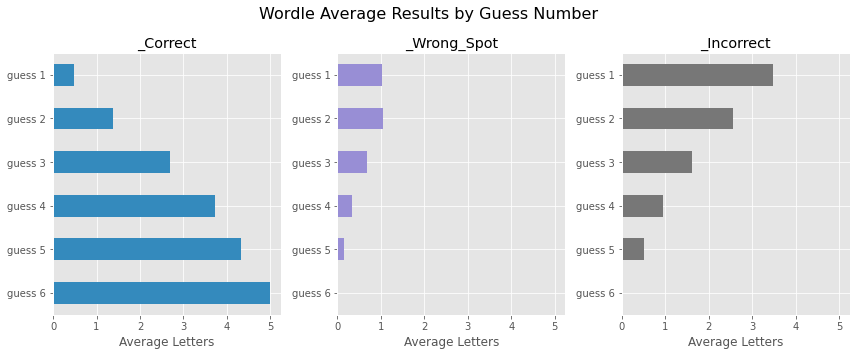

In [22]:
fig , ax = plt.subplots(1, 3, figsize = (12,5),sharex = True)
for i, x in enumerate(['_correct','_wrong_spot','_incorrect']):
    col_subset = [c for c in df.columns if x in c]
    guess_avg = df[col_subset].mean()
    guess_avg.index = [f'guess {i+1}' for i in range(6)]
    guess_avg.sort_index(ascending = False) \
             .plot(kind = 'barh',
                  title = f"{x.strip('-').replace('-',' ').title()}",
                  ax = ax[i],
                  color = color_pal[i+1])
    ax[i].set_xlabel('Average Letters')
fig.suptitle('Wordle Average Results by Guess Number',fontsize = 16)
plt.tight_layout()
plt.show()

##  Letter Analysis 

In [23]:
answer_dict = {252 : 'SPILL',
     251 : 'VIVID',
     250 : 'BLOKE',
     249 : 'TROVE',
     248 : 'THORN',
     247 : 'OTHER',
     246 : 'TACIT',
     245 : 'SWILL',
     244 : 'DODGE',
     243 : 'SHAKE',
     242 : 'CAULK',
     241 : 'AROMA',
     240 : 'CYNIC',
     239 : 'ROBIN',
     238 : 'ULTRA',
     237 : 'ULCER',
     236 : 'PAUSE',
     235 : 'HUMOR',
     234 : 'FRAME',
     233 : 'ELDER',
     232 : 'SKILL',
     231 : 'ALOFT',
     230 : 'PLEAT',
     229 : 'SHARD',
     228 : 'MOIST',
     227 : 'THOSE',
     204 : 'GORGE',
     205 : 'QUERY',
     206 : 'DRINK',
     207 : 'FAVOR',
     208 : 'ABBEY',
     209 : 'TANGY',
     210 : 'PANIC',
     211 : 'SOLAR',
     212 : 'SHIRE',
     213 : 'PROXY',
     214 : 'POINT',
     215 : 'ROBOT',
     216 : 'PRICK',
     217 : 'WINCE',
     218 : 'CRIMP',
     219 : 'KNOLL',
     220 : 'SUGAR',
     221 : 'WHACK',
     222 : 'MOUNT',
     223 : 'PERKY',
     224 : 'COULD',
     225 : 'WRUNG',
     226 : 'LIGHT',
}

df['answer'] = df['id'].map(answer_dict)

In [24]:
first_guess_correct = []
for i, d in df.dropna(subset = ['answer']).iterrows():
    example_text = d['guess1']
    example_solution = d['answer']
    results =[x.span()[0] for x in re.finditer('🟩', example_text)]
    first_guess_letters = [example_solution[i] for i in results]
    first_guess_correct += first_guess_letters

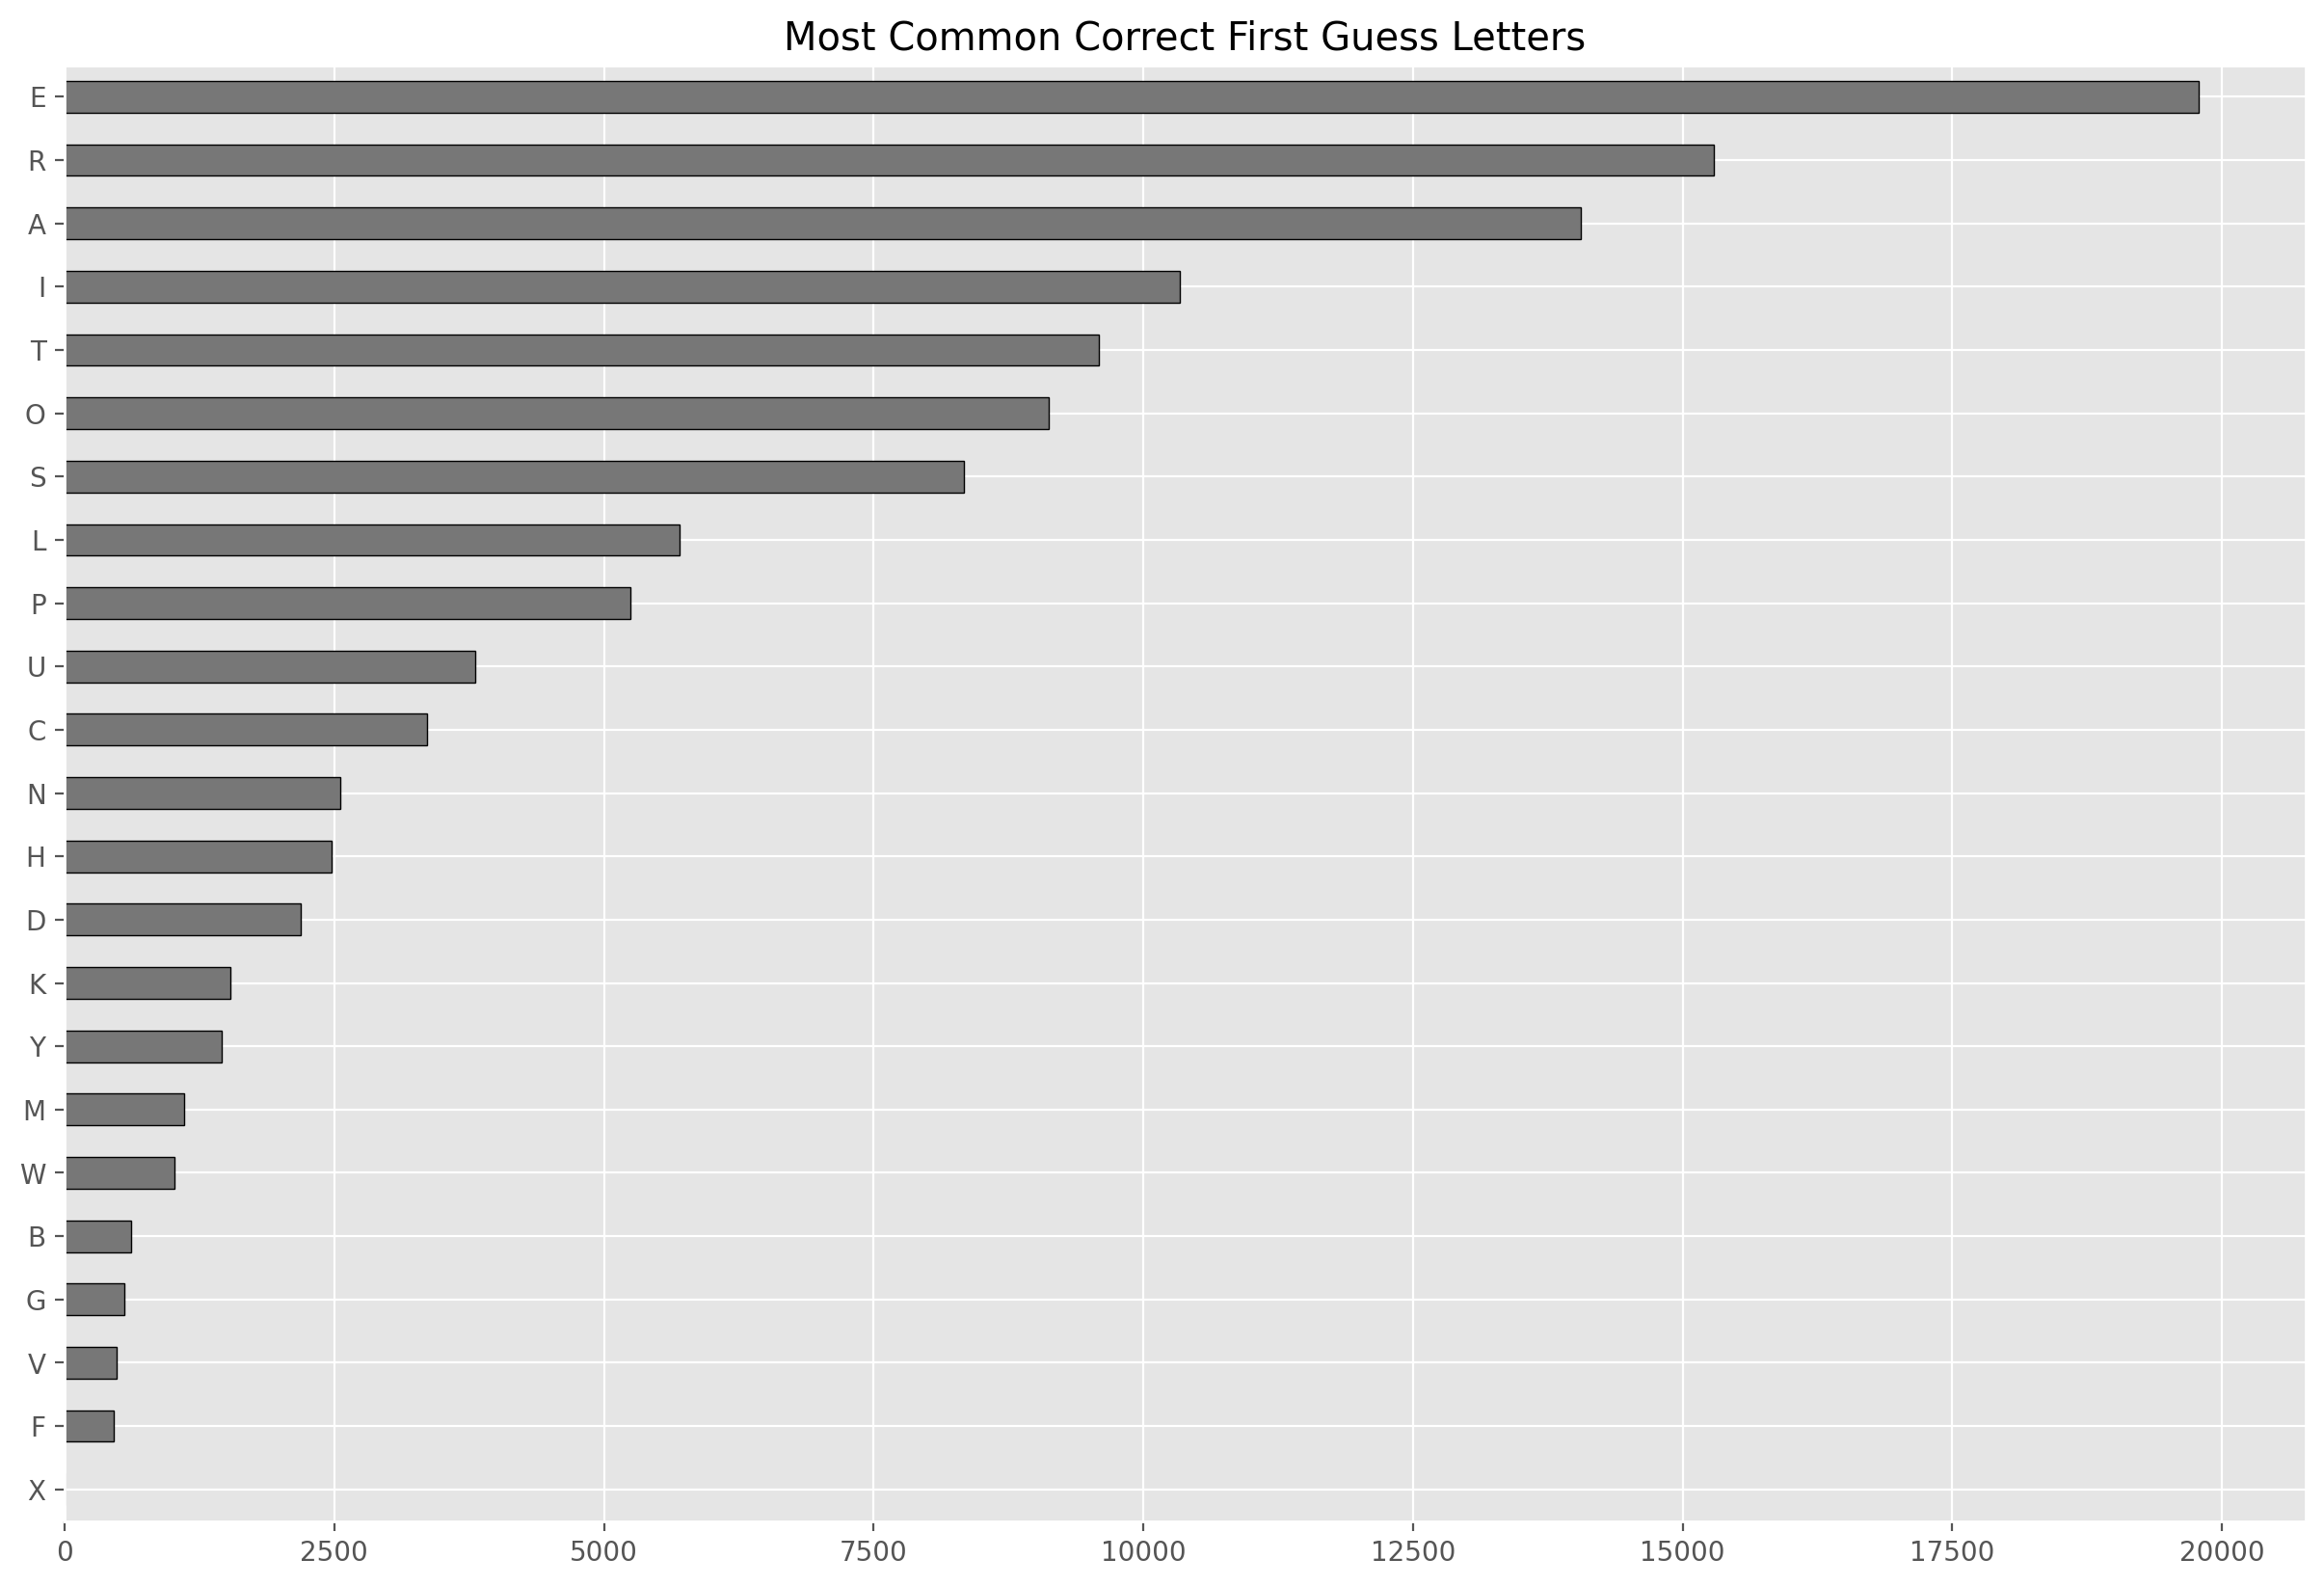

In [25]:
plt.figure(dpi = 200)
pd.Series(first_guess_correct).value_counts(ascending=True) \
    .plot(kind='barh', figsize=(15, 10),
         title='Most Common Correct First Guess Letters',
         edgecolor='black', color=color_pal[3])
plt.show()